In [112]:
import time
import numpy as np
import math

def hybrid_mergesort(arr: list, start: int, end: int, thresh: int, kc: int) -> int:
    # Returns total number of key comparisons, kc
    kc1 = kc2 = kc3 = 0
    # IN PLACE SORTING
    if start >= end:
        return 0

    if end-start+1 <= thresh:
        return insertionsort(arr, start, end)

    if end >= start + 2:
        mid = (start+end) // 2
        kc1 = hybrid_mergesort(arr, start, mid, thresh, kc)
        kc2 = hybrid_mergesort(arr, mid+1, end, thresh, kc)

    kc3 = merge(arr, start, end)
    return kc1 + kc2 + kc3

def mergesort(arr: list, start: int, end: int):
    # Returns key comparions, kc
    kc1 = kc2 = kc3 = 0

    # IN PLACE SORTING

    if start >= end:
        return 0

    if end >= start + 2:
        mid = (start+end) // 2
        kc1 = mergesort(arr, start, mid)
        kc2 = mergesort(arr, mid+1, end)

    kc3 = merge(arr, start, end)
    return kc1 + kc2 + kc3

def merge(arr: list, start: int, end: int):
    # Returns key comparisons
    kc = 0
    if start >= end:
        return 0

    mid = start + (end-start) // 2
    start2 = mid + 1

    while start <= mid and start2 <= end:

        # Case 1: if first element is smaller than or equal to right element, i.e correct place
        kc += 1
        if arr[start] <= arr[start2]:
            start += 1

        # Case 2: if first element is larger than right element, then shift the right element to before the left element
        else:
            # Right shift all elements from "start" up till element before "start2"
            value = arr[start2]
            for index in range(start2, start, -1):
                arr[index] = arr[index-1]
            # Copy over original start2 value into original start index
            arr[start] = value

            # Update all pointers for next iteration of while loop
            start += 1
            mid += 1
            start2 += 1
    return kc


def insertionsort(arr: list, start: int, end: int):
    # Returns key comparsions
    kc = 0
    for i in range(start+1, end+1):
        for j in range(i, start, -1):
            kc += 1
            if arr[j] < arr[j-1]:
                swap(arr, j, j-1)
            else:
                break
    return kc

def swap(arr: list, i: int, j: int):
    tmp = arr[j]
    arr[j] = arr[i]
    arr[i] = tmp
    return

In [113]:
test_arr = [5,44,21,73,60,1]
# hybrid_mergesort(arr=test_arr, start=0, end=len(test_arr)-1, thresh=6, kc=0)
insertionsort(arr=test_arr, start=0, end=len(test_arr)-1)

11

In [130]:
matrix_merge = np.random.randint(low=0, high=10, size=[10, 3])


In [134]:
np.mean(matrix_merge, axis=1)

array([2.66666667, 5.33333333, 5.        , 6.66666667, 2.        ,
       3.66666667, 5.        , 6.66666667, 3.        , 2.33333333])

In [146]:
def compare_kc_average():
    
    # MAX_LENGTH = 2**14
    MAX_LENGTH = 20
    ITERATIONS = 100

    t = time.strftime('%H:%M:%S', time.localtime())
    print(f"Processing size = {MAX_LENGTH}. Start time = {t}.", end="... ")
    matrix_merge = np.zeros([MAX_LENGTH, ITERATIONS])
    matrix_insert = np.zeros([MAX_LENGTH, ITERATIONS])

    for n in range(1, MAX_LENGTH+1):
        
        np.random.seed(27)
        for i in range(1, ITERATIONS+1):
            # Generate new array every iteration
            ori_arr = np.random.randint(low=0, high=999, size=n).tolist()
            matrix_merge[n-1][i-1]= mergesort(arr=ori_arr, start=0, end=len(ori_arr)-1) # Store key comparison

        np.random.seed(27)
        for i in range(1, ITERATIONS+1):
            # Generate new array every iteration
            ori_arr = np.random.randint(low=0, high=999, size=n).tolist()
            matrix_insert[n-1][i-1]= insertionsort(arr=ori_arr, start=0, end=len(ori_arr)-1) # Store key comparison

       
    thresh_kc_merge = np.mean(matrix_merge, axis=1)
    thresh_kc_insert = np.mean(matrix_insert, axis=1)


    # For each n, save the thresh_timings for later plotting.
    np.save(f"./kc_compare2/up_to_{MAX_LENGTH}.npy", [thresh_kc_merge, thresh_kc_insert]) #todo
    t = time.strftime('%H:%M:%S', time.localtime())
    print(f"End time = {t}")

In [147]:
compare_kc_average()

Processing size = 20. Start time = 14:24:25.... End time = 14:24:25


In [148]:
matrix = np.load(f"./kc_compare2/up_to_{100}.npy")
matrix[0]

array([  0.        ,   1.        ,   3.        ,   4.66666667,
         7.66666667,  10.33333333,  13.33333333,  16.        ,
        19.33333333,  23.66666667,  27.33333333,  31.        ,
        34.        ,  37.66666667,  42.33333333,  46.66666667,
        51.        ,  54.33333333,  60.        ,  65.        ,
        69.66666667,  74.66666667,  79.        ,  82.66666667,
        88.33333333,  93.        ,  98.        , 102.        ,
       107.        , 110.66666667, 115.33333333, 119.33333333,
       127.33333333, 132.        , 137.        , 143.        ,
       149.        , 153.66666667, 157.66666667, 164.33333333,
       172.33333333, 177.        , 184.        , 187.66666667,
       190.        , 199.        , 206.        , 209.33333333,
       219.66666667, 222.33333333, 228.33333333, 233.66666667,
       239.        , 246.        , 252.66666667, 258.33333333,
       269.        , 268.        , 272.66666667, 280.66666667,
       291.33333333, 289.66666667, 296.        , 305.  

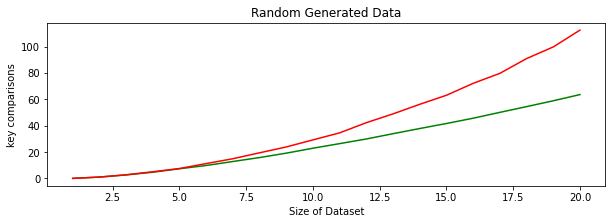

In [149]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import numpy as np

# Plotting the graphs for visualisation
MAX_LENGTH = 20
ITERATIONS = 100


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,3)) # 1 Row of many axes that differ based on array
x = np.arange(1, MAX_LENGTH+1, 1)
# x_smooth = np.linspace(x.min(), x.max(), MAX_THRESH*50)

try:
    matrix = np.load(f"./kc_compare2/up_to_{MAX_LENGTH}.npy")
    arr_merge = matrix[0]
    arr_insert = matrix[1]

    # Create smooth line chart 
    y_smooth = savgol_filter(arr, 5, 3)

    # ax[j].plot(x, arr)
    ax.plot(x, arr_merge, color='green')
    ax.plot(x, arr_insert, color='red')
    # ax[j].plot(x, y_smooth)
    ax.set_title(f"Random Generated Data")    
    ax.set_ylabel("key comparisons")
    ax.set_xlabel("Size of Dataset")
    
except Exception as e:
    print(e)